In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
controller_output = Path('output')

In [3]:
low_df = pd.read_csv(controller_output / '100_runs_lowest.csv')
high_df = pd.read_csv(controller_output / '100_runs_highest.csv')
random_df = pd.read_csv(controller_output / '100_runs_random.csv')

In [4]:
low_df

,run,fix_status,shop,component,component_utility,required_interface,request,replica,perf_max,importance,...,sat_point,adt,uid,connectivity,provided_interface,rule_names,failure_name,rule_costs,sys_utility,predicted_optimal_utility
0,1,before,mRUBiS #1,Availability Item Filter,0.000000,1,89.0,6.0,16.805051,12.0,...,0.056489,1.076220,_b_K1WuSREeumKfox9_84gw,2.0,1,"[HwRedeployComponent, ReplaceComponent]",CF3,"[1.63, 1.63]",2.013421e+06,NaN
1,1,before,mRUBiS #1,Bid and Buy Service,12881.268890,5,360.0,14.0,17.056133,12.0,...,0.038633,1.316753,_b_K1MuSREeumKfox9_84gw,7.0,2,NaN,NaN,NaN,2.013421e+06,NaN
2,1,before,mRUBiS #1,Seller Reputation Item Filter,8735.816557,1,314.0,10.0,15.184877,12.0,...,0.031146,1.067252,_b_K1ZOSREeumKfox9_84gw,2.0,1,NaN,NaN,NaN,2.013421e+06,NaN
3,1,before,mRUBiS #1,User Management Service,3945.245093,4,108.0,6.0,6.593309,12.0,...,0.052246,1.074025,_b_JnAOSREeumKfox9_84gw,8.0,4,NaN,NaN,NaN,2.013421e+06,NaN
4,1,before,mRUBiS #1,Reputation Service,3043.073771,4,357.0,14.0,7.834721,12.0,...,0.037516,1.246731,_b_K1PuSREeumKfox9_84gw,5.0,1,NaN,NaN,NaN,2.013421e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,100,after,mRUBiS #10,Inventory Service,9092.534693,2,131.0,32.0,11.117148,21.0,...,0.058054,1.240965,_G31RsO-XEeuQv_K1ufwCSw,3.0,1,NaN,NaN,NaN,2.444546e+06,[23430.07784165]
35996,100,after,mRUBiS #10,Region Item Filter,22384.809433,1,246.0,30.0,18.388965,21.0,...,0.058516,1.294757,_b_Pu1eSREeumKfox9_84gw,2.0,1,NaN,NaN,NaN,2.444546e+06,[42718.36765245]
35997,100,after,mRUBiS #10,Category Item Filter,10562.517802,1,407.0,11.0,16.836799,21.0,...,0.033603,1.066150,_b_Pu5uSREeumKfox9_84gw,2.0,1,NaN,NaN,NaN,2.444546e+06,[32668.38425565]
35998,100,after,mRUBiS #10,Last Second Sales Item Filter,17221.655864,1,287.0,23.0,19.541519,21.0,...,0.054530,1.369359,_Gniy8O-XEeuQv_K1ufwCSw,2.0,1,NaN,NaN,NaN,2.444546e+06,[40862.24728311]


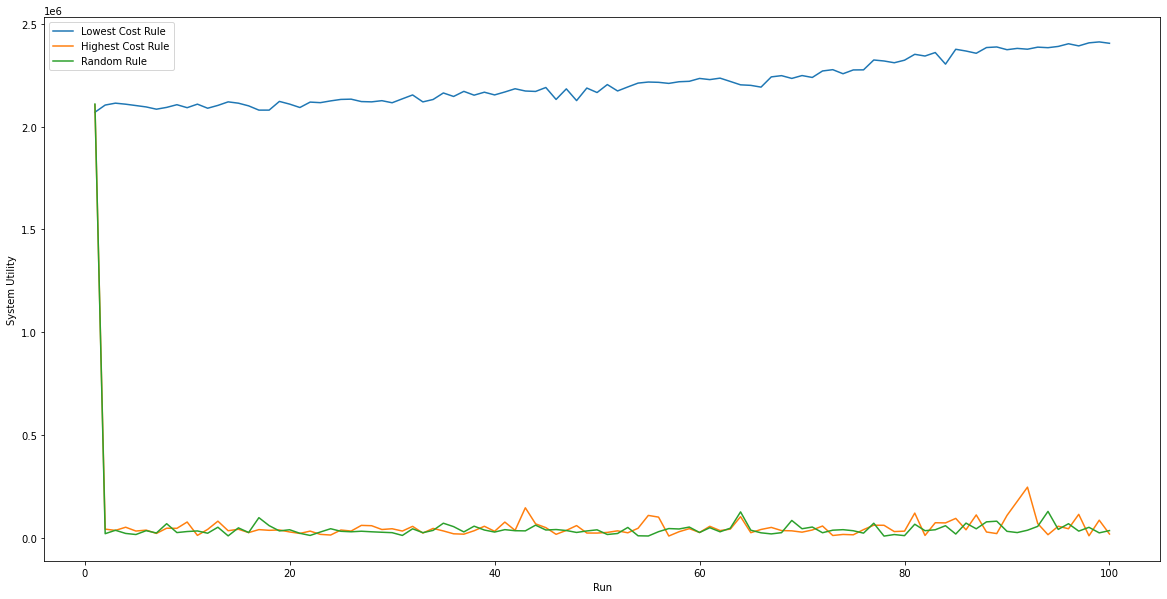

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='run', y='sys_utility', data=low_df, ax=ax, ci=None, label='Lowest Cost Rule')
sns.lineplot(x='run', y='sys_utility', data=high_df, ax=ax, ci=None, label='Highest Cost Rule')
sns.lineplot(x='run', y='sys_utility', data=random_df, ax=ax, ci=None, label='Random Rule')
ax.set(xlabel='Run', ylabel='System Utility');

In [6]:
for df in [low_df, high_df, random_df]:
    df['shop_utility'] = df.groupby(['run', 'fix_status', 'shop'])['component_utility'].agg('sum').reset_index()['component_utility']

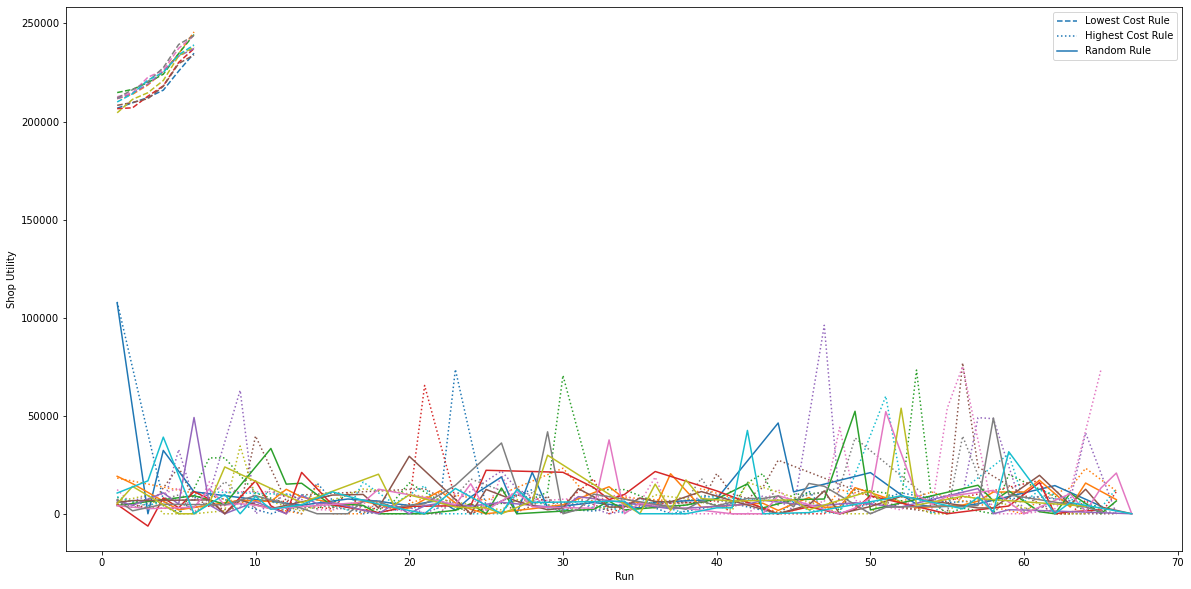

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
lowest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=low_df, ci=None, linestyle='dashed', ax=ax, label='Lowest Cost Rule', legend=False)
highest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=high_df, ci=None, linestyle='dotted', ax=ax, label='Highest Cost Rule', legend=False)
random = sns.lineplot(x='run', y='shop_utility', hue='shop', data=random_df, ci=None, ax=ax, label='Random Rule', legend=False)
ax.set(xlabel='Run', ylabel='Shop Utility');
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::10], ['Lowest Cost Rule', 'Highest Cost Rule', 'Random Rule']);